<a href="https://colab.research.google.com/github/HenokBerhanu/disag_vcc/blob/master/VCC2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### FOR F1 SPLIT #############3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load and preprocess data
data = pd.read_csv('cpu_memory_usage_f1_split.txt', delimiter='\t')
data.columns = data.columns.str.strip()
data['Bandwidth'] = data['CPU-usage'] * data['Memory-usage'] / 1e6

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['CPU-usage', 'Memory-usage', 'Bandwidth']])

In [ ]:
# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, :])
    return np.array(X), np.array(y)

In [ ]:
# Sequence length
seq_length = 10

# Assuming scaled_data is defined and is a NumPy array
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build improved LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, 3)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(3)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 1.2962 - mae: 0.8813 - val_loss: 0.2108 - val_mae: 0.4279 - learning_rate: 0.0010
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.5437 - mae: 0.5866 - val_loss: 0.1507 - val_mae: 0.3380 - learning_rate: 0.0010
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2846 - mae: 0.4273 - val_loss: 0.1196 - val_mae: 0.2650 - learning_rate: 0.0010
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1748 - mae: 0.3339 - val_loss: 0.1099 - val_mae: 0.2332 - learning_rate: 0.0010
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1221 - mae: 0.2762 - val_loss: 0.1040 - val_mae: 0.2273 - learning_rate: 0.0010
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0886 - mae: 0.2324 - val_loss: 0.0955 - val_mae: 0.2290 - learning_rate: 0.0010
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0709 - mae: 0.2075 - val_loss: 0.0838 - val_mae: 0.2180 - learning_rate: 0.0010
Epoch 

In [ ]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test Loss: 0.0072, Test MAE: 0.0583


In [ ]:
# Make predictions
predictions = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
# Inverse transform the scaled data
y_test_original = scaler.inverse_transform(y_test)
predictions_original = scaler.inverse_transform(predictions)

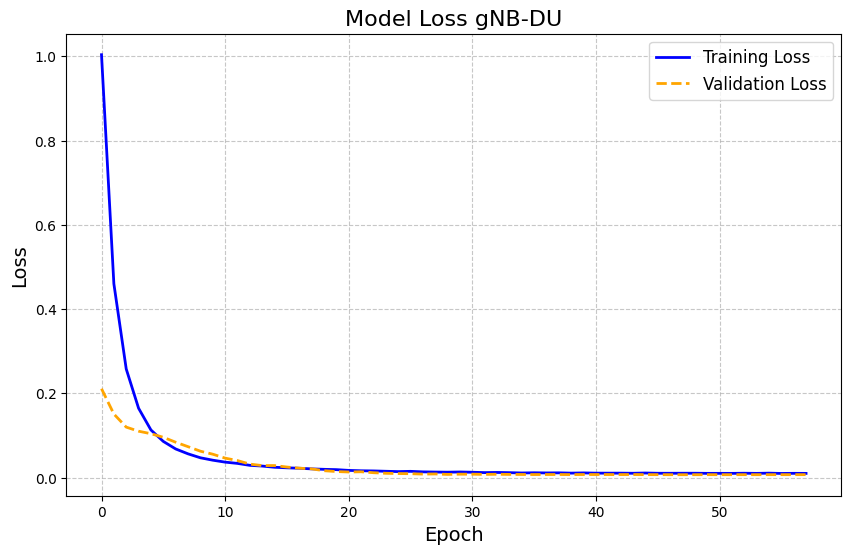

In [ ]:
# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Model Loss gNB-DU', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
#plt.yscale('log')
plt.show()

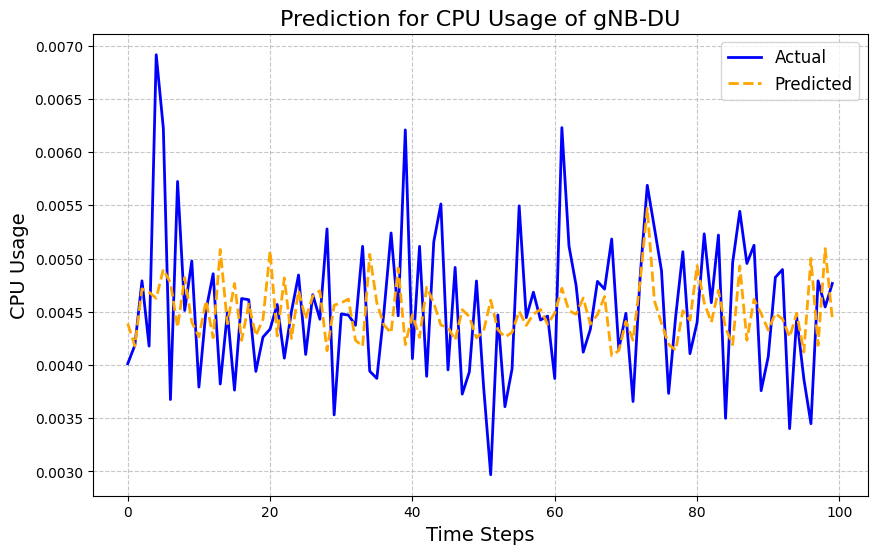

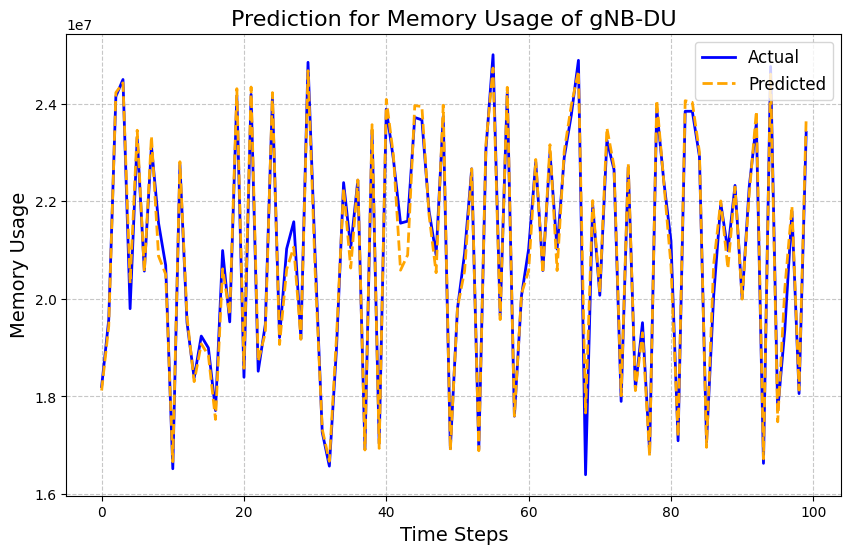

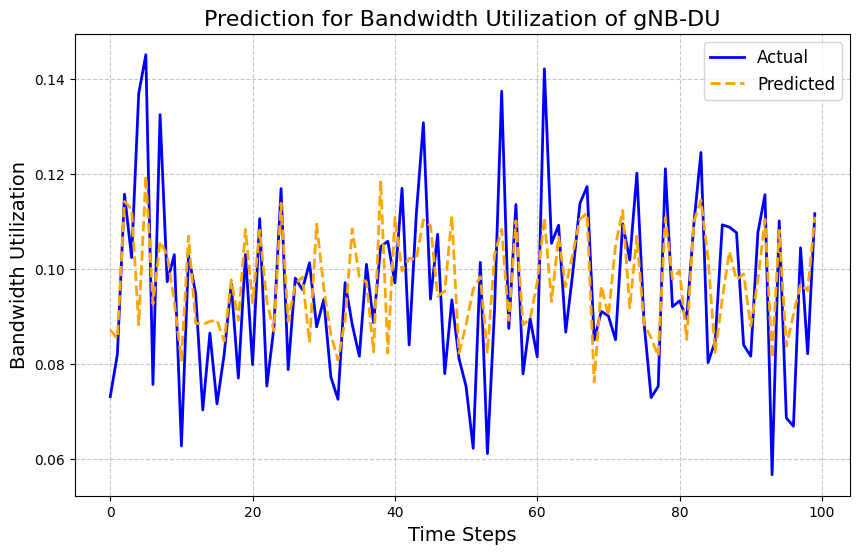

In [ ]:
# Plot results for each feature
# List of features to plot
features = ['CPU Usage', 'Memory Usage', 'Bandwidth Utilization']

# Loop through each feature and plot actual vs. predicted
for i in range(3):
    plt.figure(figsize=(10, 6))

    # Plot actual values
    plt.plot(y_test_original[:100, i], label='Actual', color='blue', linewidth=2)

    # Plot predicted values with a different style
    plt.plot(predictions_original[:100, i], label='Predicted', color='orange', linestyle='--', linewidth=2)

    # Add title and labels
    plt.title(f'Prediction for {features[i]} of gNB-DU', fontsize=16)
    plt.xlabel('Time Steps', fontsize=14)
    plt.ylabel(features[i], fontsize=14)

    # Add grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    plt.legend(fontsize=12)

    # Show the plot
    plt.show()

In [ ]:
# Calculate and print MAPE for each feature
for i in range(3):
    mape = np.mean(np.abs((y_test_original[:, i] - predictions_original[:, i]) / y_test_original[:, i])) * 100
    print(f"MAPE for {features[i]}: {mape:.2f}%")

MAPE for CPU Usage: 12.58%
MAPE for Memory Usage: 1.11%
MAPE for Bandwidth Utilization: 12.92%


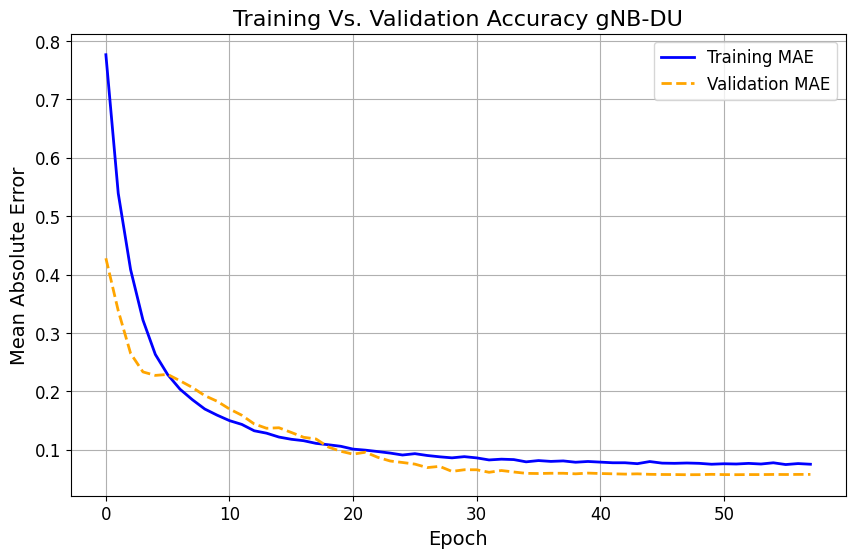

In [ ]:
# Plot training vs. validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE', color='blue', linewidth=2)
plt.plot(history.history['val_mae'], label='Validation MAE', color='orange', linestyle='--', linewidth=2)
plt.title('Training Vs. Validation Accuracy gNB-DU', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Mean Absolute Error', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Calculate overall regression metrics
mse = mean_squared_error(y_test_original, predictions_original)
mae = mean_absolute_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)
print(f"Overall Mean Squared Error: {mse:.4f}")
print(f"Overall Mean Absolute Error: {mae:.4f}")
print(f"Overall R-squared Score: {r2:.4f}")

Overall Mean Squared Error: 81155118824.7518
Overall Mean Absolute Error: 73131.7740
Overall R-squared Score: 0.4232


In [ ]:
# Calculate feature-specific metrics
for i, feature in enumerate(features):
    mse = mean_squared_error(y_test_original[:, i], predictions_original[:, i])
    mae = mean_absolute_error(y_test_original[:, i], predictions_original[:, i])
    r2 = r2_score(y_test_original[:, i], predictions_original[:, i])
    print(f"\nMetrics for {feature}:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")


Metrics for CPU Usage:
MSE: 0.0000
MAE: 0.0006
R-squared: -0.0194

Metrics for Memory Usage:
MSE: 243465356474.2552
MAE: 219395.3096
R-squared: 0.9597

Metrics for Bandwidth Utilization:
MSE: 0.0002
MAE: 0.0117
R-squared: 0.3294


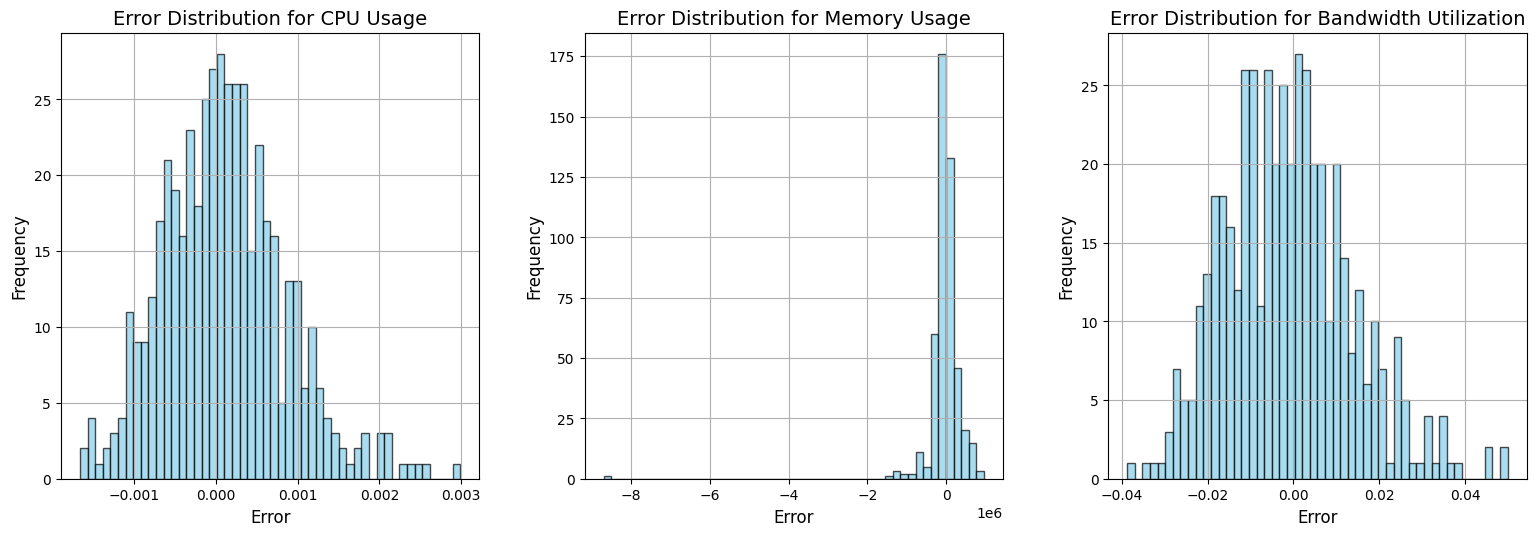

In [ ]:
# Plot error distribution
errors = y_test_original - predictions_original
plt.figure(figsize=(16, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.hist(errors[:, i], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Error Distribution for {feature}', fontsize=14)
    plt.xlabel('Error', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout(pad=3.0)
plt.show()